In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Compare continuous and discrete model

In [2]:
R = 5
data = os.path.join('..', 'data')

## Compare Pareto sets

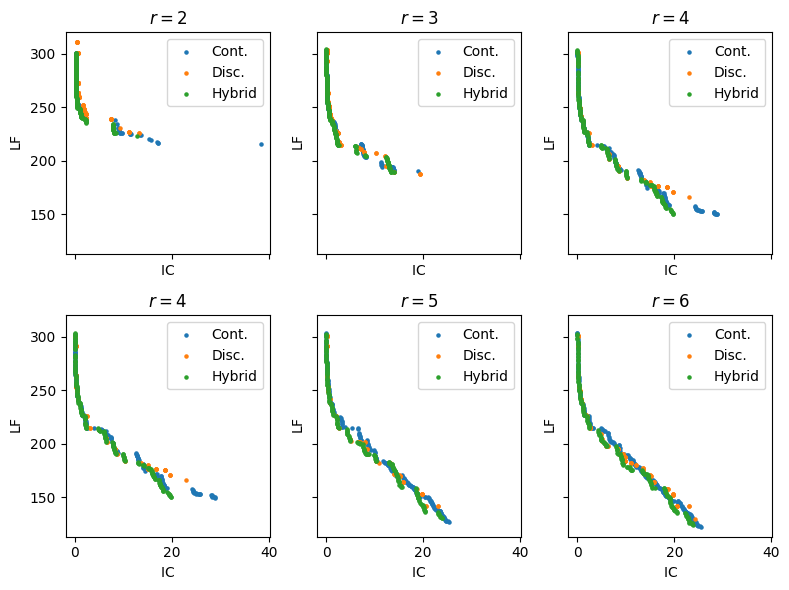

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6), sharex=True, sharey=True)

m_size = 5

for i in range(2):
    for j in range(3):
        ax = axs[i, j]

        cont = pd.read_csv(os.path.join(data, f'continuous_r{2 + 2 * i + j}.csv'))
        ax.scatter(cont['IC'], cont['LF'], s=m_size)

        disc = pd.read_csv(os.path.join(data, f'discrete_r{2 + 2 * i + j}.csv'))
        ax.scatter(disc['IC'], disc['LF'], s=m_size)

        hyb = pd.read_csv(os.path.join(data, f'hybrid_r{2 + 2 * i + j}.csv'))
        ax.scatter(hyb['IC'], hyb['LF'], s=m_size)

        ax.set_title(f'$r={2 + 2 * i + j}$')
        ax.set_xlabel('$\mathsf{IC}$')
        ax.set_ylabel('$\mathsf{LF}$')
        ax.legend(['Cont.', 'Disc.', 'Hybrid'])

fig.tight_layout()
fig.savefig("pareto.pdf")
fig.show()

## Compare HV

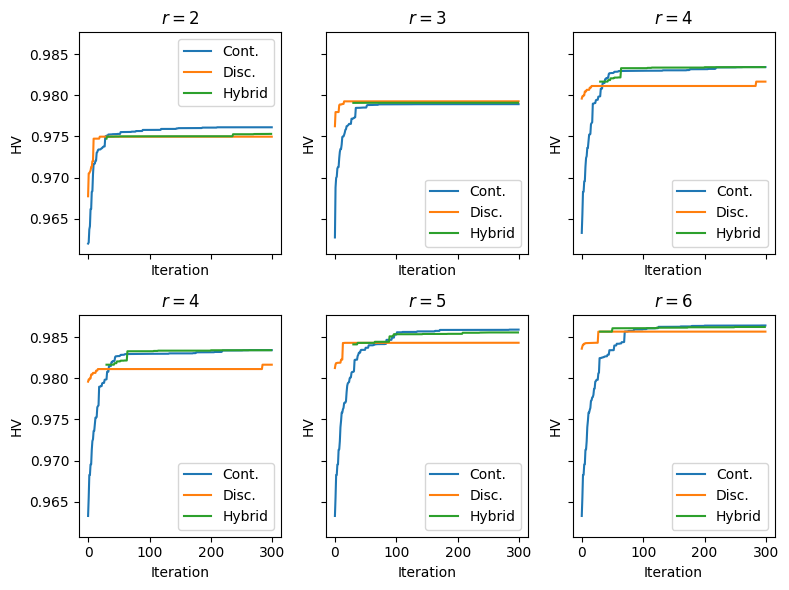

In [4]:

fig, axs = plt.subplots(2, 3, figsize=(8, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(3):
        ax = axs[i, j]

        cont = pd.read_csv(os.path.join(data, f'continuous_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(cont['iter'], cont['HV'])

        disc = pd.read_csv(os.path.join(data, f'discrete_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(disc['iter'], disc['HV'])

        hyb = pd.read_csv(os.path.join(data, f'hybrid_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(hyb['iter'] + 30, hyb['HV'])

        ax.set_title(f'$r={2 + 2 * i + j}$')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('HV')
        ax.legend(['Cont.', 'Disc.', 'Hybrid'])

fig.tight_layout()
fig.savefig("hv.pdf")
# fig.show()

## 3-objective, 200 individuals

In [5]:
import dill
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import viridis

# Create a ListedColormap for discrete values using viridis colormap
cmap = ListedColormap(viridis(np.linspace(0, 1, 10)))

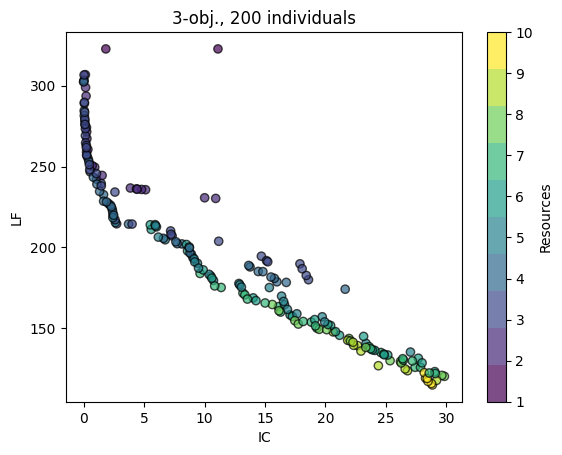

In [6]:
with open('../data/three-obj-200', 'rb') as f:
    res = dill.load(f)

F = res.opt.get("F")

# Scatter plot with colors
plt.scatter(F[:, 0], F[:, 1], c=F[:, 2], cmap=cmap, edgecolors='k', alpha=0.7)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Resources')

# Set labels and title
plt.xlabel('IC')
plt.ylabel('LF')
plt.title('3-obj., 200 individuals')

# Show the plot
plt.show()


## 3-objectives, 400 individuals

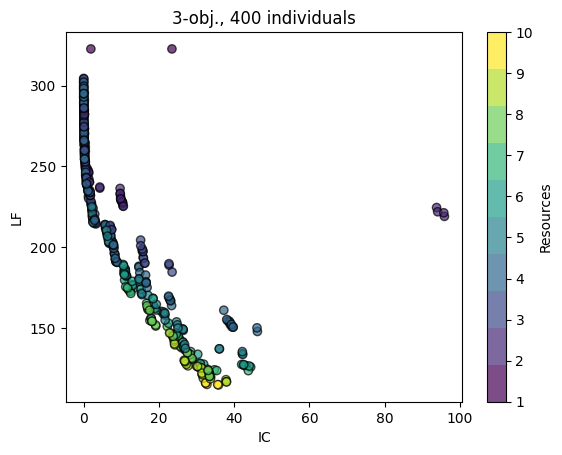

In [7]:
with open('../data/three-obj', 'rb') as f:
    res = dill.load(f)

F = res.opt.get("F")

# Scatter plot with colors
plt.scatter(F[:, 0], F[:, 1], c=F[:, 2], cmap=cmap, edgecolors='k', alpha=0.7)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Resources')

# Set labels and title
plt.xlabel('IC')
plt.ylabel('LF')
plt.title('3-obj., 400 individuals')

# Show the plot
plt.show()
